https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [4]:
ruta_data_Clean = './DataSetRegresion/Clean_Dataset.csv'

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(ruta_data_Clean)
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df1 = df.drop(columns=['Unnamed: 0', 'flight'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'days_left'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

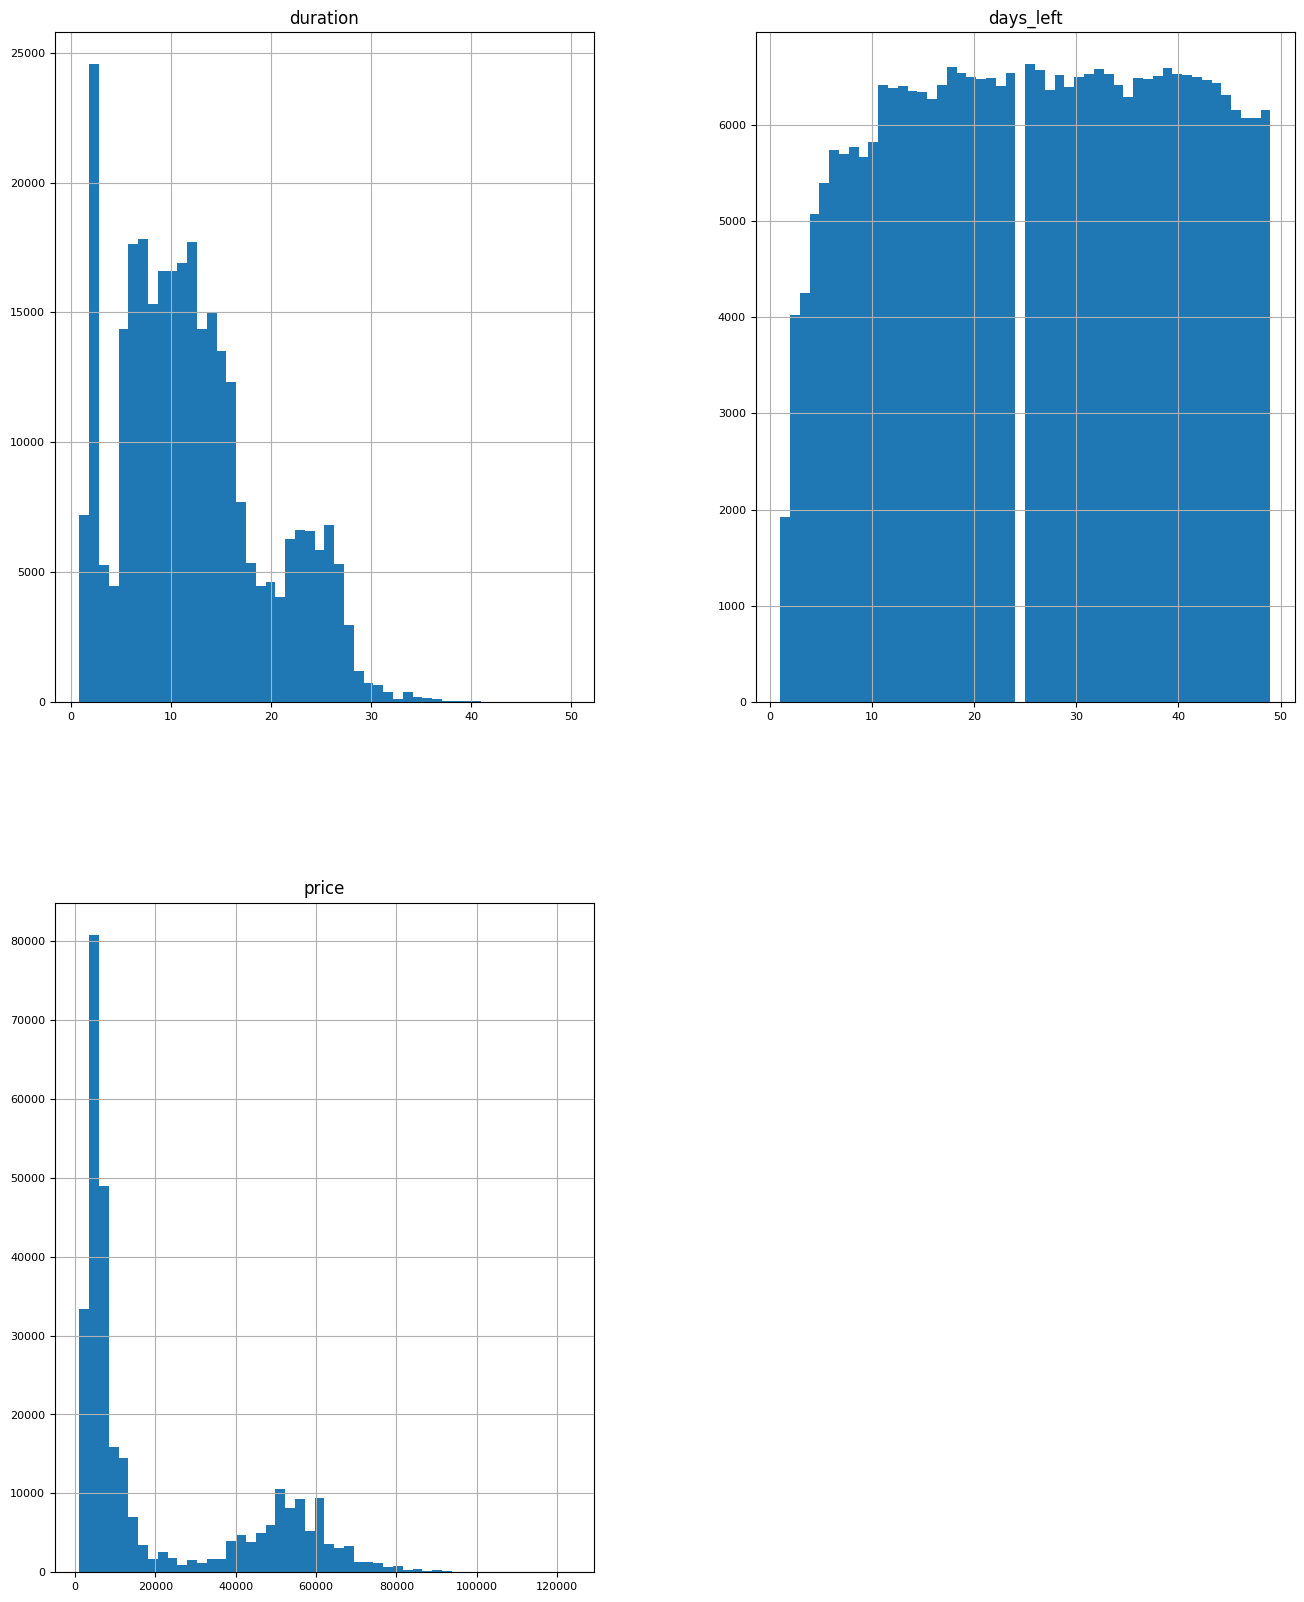

In [8]:
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

VAriables Categoricas a Numericas

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



# Inicializar el codificador MinMaxScaler
scaler = MinMaxScaler()

# Lista de nombres de columnas numéricas
colum_num = ['duration', 'days_left', 'price']  # Puedes agregar las columnas numéricas que necesites normalizar

# Normalizar las columnas numéricas
df1[colum_num] = scaler.fit_transform(df1[colum_num])

# Inicializar el codificador LabelEncoder
encoder = LabelEncoder()

# Lista de nombres de columnas categóricas
colum_cat = ['airline', 'source_city','departure_time','arrival_time', 'stops', 'destination_city', 'class']  # Puedes agregar las columnas categóricas que necesites codificar

# Codificar las columnas categóricas
for columna in colum_cat:
    df1[columna + '_enco'] = encoder.fit_transform(df1[columna])
    # Crear un diccionario de mapeo de categorías
    mapeo_categorias = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f'Columna {columna}, mapeo = {mapeo_categorias}')


Columna airline, mapeo = {'AirAsia': 0, 'Air_India': 1, 'GO_FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'Vistara': 5}
Columna source_city, mapeo = {'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
Columna departure_time, mapeo = {'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5}
Columna arrival_time, mapeo = {'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5}
Columna stops, mapeo = {'one': 0, 'two_or_more': 1, 'zero': 2}
Columna destination_city, mapeo = {'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
Columna class, mapeo = {'Business': 0, 'Economy': 1}


In [10]:
df_final = df1.drop(columns=colum_cat)
df_final.head(3)

,duration,days_left,price,airline_enco,source_city_enco,departure_time_enco,arrival_time_enco,stops_enco,destination_city_enco,class_enco
0,0.027347,0.0,0.039749,4,2,2,5,2,5,1
1,0.030612,0.0,0.039749,4,2,1,4,2,5,1
2,0.027347,0.0,0.039773,0,2,1,1,2,5,1


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   duration               300153 non-null  float64
 1   days_left              300153 non-null  float64
 2   price                  300153 non-null  float64
 3   airline_enco           300153 non-null  int32  
 4   source_city_enco       300153 non-null  int32  
 5   departure_time_enco    300153 non-null  int32  
 6   arrival_time_enco      300153 non-null  int32  
 7   stops_enco             300153 non-null  int32  
 8   destination_city_enco  300153 non-null  int32  
 9   class_enco             300153 non-null  int32  
dtypes: float64(3), int32(7)
memory usage: 14.9 MB


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'days_left'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'airline_enco'}>,
        <Axes: title={'center': 'source_city_enco'}>,
        <Axes: title={'center': 'departure_time_enco'}>],
       [<Axes: title={'center': 'arrival_time_enco'}>,
        <Axes: title={'center': 'stops_enco'}>,
        <Axes: title={'center': 'destination_city_enco'}>],
       [<Axes: title={'center': 'class_enco'}>, <Axes: >, <Axes: >]],
      dtype=object)

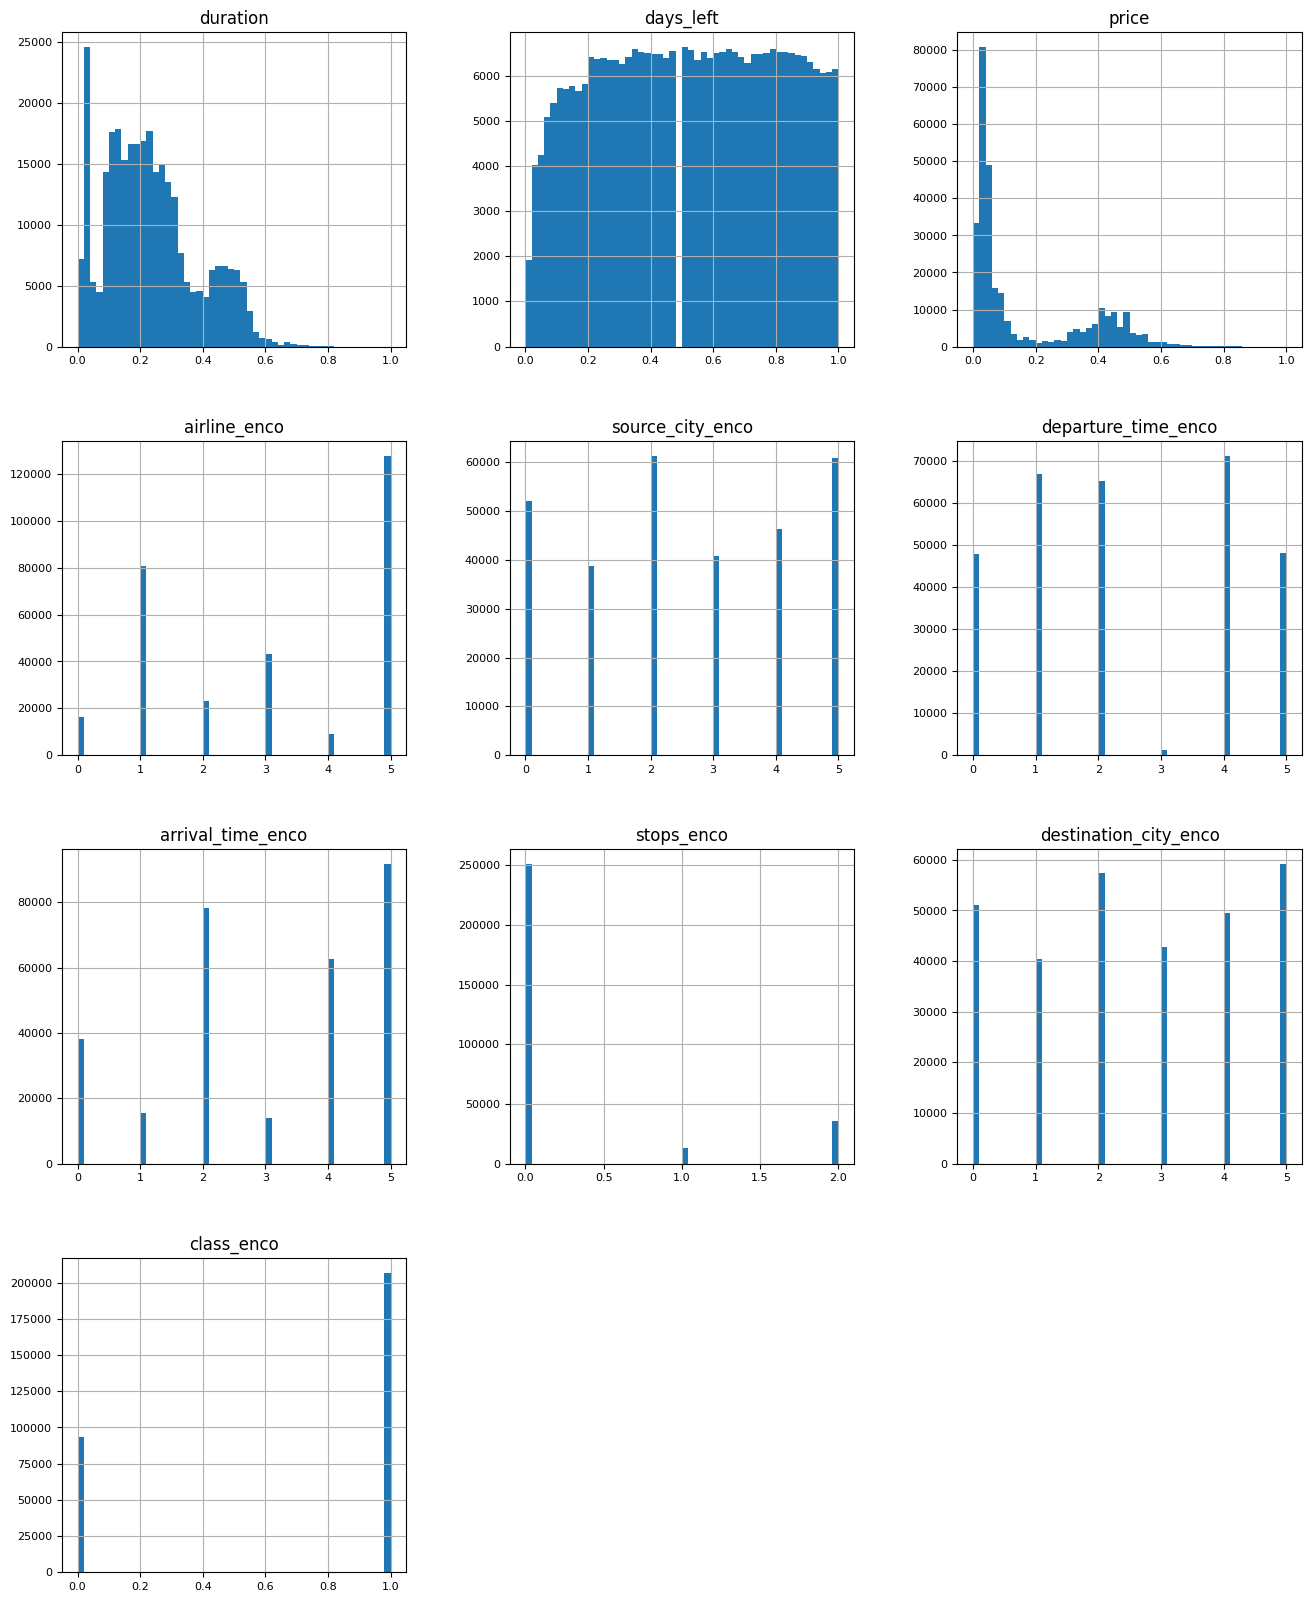

In [12]:
df_final.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
X = df_final.drop(columns='price')

y = df_final['price']

# División del conjutno de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42 )

print('Conjunto de datos de entrada de entrenamiento', X_train.shape)
print('Conjunto de datos de salida de entrenamiento', y_train.shape)

print('Conjunto de datos de entrada de prueba', X_test.shape)
print('Conjunto de datos de salida de prueba', y_test.shape)

Conjunto de datos de entrada de entrenamiento (240122, 9)
Conjunto de datos de salida de entrenamiento (240122,)
Conjunto de datos de entrada de prueba (60031, 9)
Conjunto de datos de salida de prueba (60031,)


In [14]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
# predecir label de prueba
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Error cuadratico medio R_lineal: ', mse)
print('Coeficiente de Determinación (R²): R_lineal: ', r2)
print('Error Absoluto Medio (MAE): ', mae)
print('Error Cuadrático Medio Raíz (RMSE): ', rmse)

Error cuadratico medio R_lineal:  0.0005219027166279902
Coeficiente de Determinación (R²): R_lineal:  0.9849390147231977
Error Absoluto Medio (MAE):  0.008930671956395228
Error Cuadrático Medio Raíz (RMSE):  0.02284519022963018


c:\Users\camil\Downloads\Clases\Tema2\venv_proyect_reto2\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)
# predecir label de prueba
y_pred_dtr = dtr.predict(X_test)

mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)

print('Error cuadratico medio R_lineal: ', mse_dtr)
print('Coeficiente de Determinación (R²): R_lineal: ', r2_dtr)
print('Error Absoluto Medio (MAE): ', mae_dtr)
print('Error Cuadrático Medio Raíz (RMSE): ', rmse_dtr)

Error cuadratico medio R_lineal:  0.0008584999041068394
Coeficiente de Determinación (R²): R_lineal:  0.9752255468233063
Error Absoluto Medio (MAE):  0.009689824140176138
Error Cuadrático Medio Raíz (RMSE):  0.02930016901157465


c:\Users\camil\Downloads\Clases\Tema2\venv_proyect_reto2\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


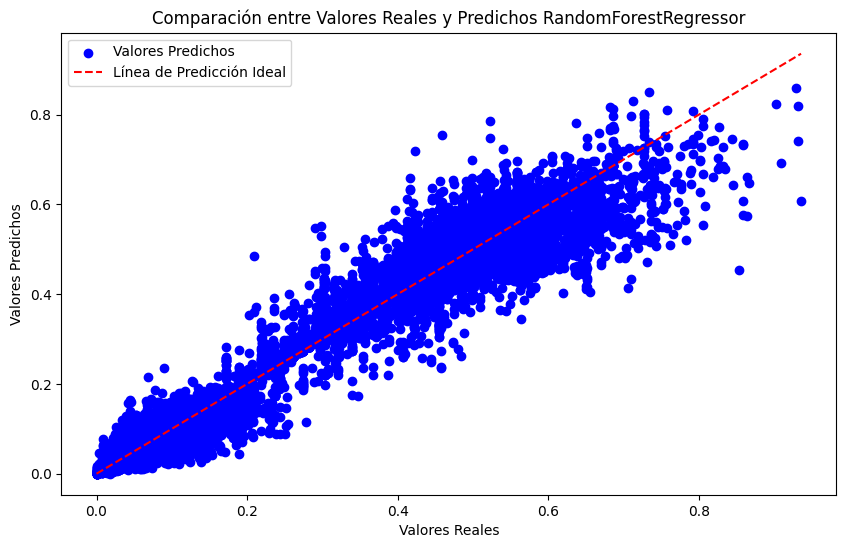

In [17]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valores Predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de Predicción Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos RandomForestRegressor')
plt.legend()
plt.show()

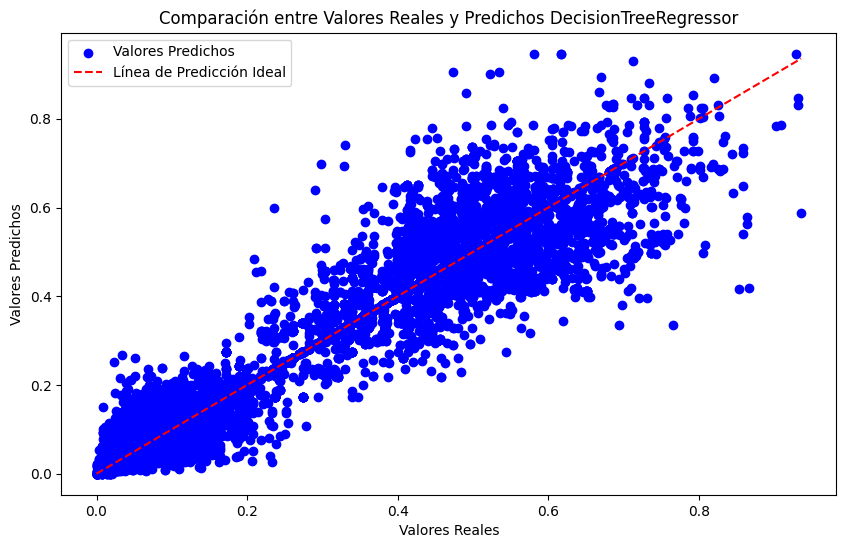

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, color='blue', label='Valores Predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de Predicción Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos DecisionTreeRegressor')
plt.legend()
plt.show()

Máquinas de soporte vectorial en regresión

In [21]:
from sklearn.manifold import TSNE
import seaborn as sns

# Aplicar t-SNE para regresión
tsne_reg = TSNE(n_components=2, random_state=42)
X_tsne_reg = tsne_reg.fit_transform(X)

# Visualizar los resultados para regresión
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne_reg[:, 0], y=X_tsne_reg[:, 1], hue=y, palette='viridis')
plt.title('t-SNE para regresión')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [22]:
from sklearn.svm import SVR

model_svr = SVR(kernel ='linear')

model_svr.fit(X_train, y_train)

# predecir label de prueba
y_pred_svr = model_svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)

print('Error cuadratico medio R_lineal: ', mse_svr)
print('Coeficiente de Determinación (R²): R_lineal: ', r2_svr)
print('Error Absoluto Medio (MAE): ', mae_svr)
print('Error Cuadrático Medio Raíz (RMSE): ', rmse_svr)